In [19]:
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

- https://www.kaggle.com/code/adityaghuse/spam-detection-begineer-friendly
- https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(5842, 2)

In [4]:
df.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [5]:
df.isna().sum()

Sentence     0
Sentiment    0
dtype: int64

<AxesSubplot:>

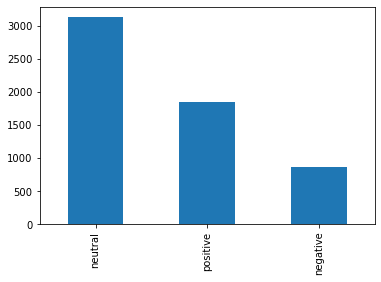

In [6]:
df['Sentiment'].value_counts().plot.bar()

# Preprocessing

Below are the steps we are taking to pre-process our text

Lowercasing: Lowercasing involves converting all the text to lowercase letters. This step is necessary to ensure uniformity in the text data. For example, "Hello" and "hello" should be treated as the same word.

Tokenization: Tokenization is the process of breaking down the text into individual words or tokens. It helps in splitting the text into meaningful units. For example, the sentence "I love dogs" would be tokenized into three separate tokens: "I," "love," and "dogs."

Removing Special Characters: Special characters such as punctuation marks, symbols, or any non-alphanumeric characters are often removed from the text. This step is performed to eliminate noise and focus on the essential textual content.

Removing Stop Words and Punctuation: Stop words are common words like "the," "is," or "and" that do not carry significant meaning in the context of the text analysis. Removing stop words helps in reducing the dimensionality of the data and improving computational efficiency. Additionally, removing punctuation marks helps to further clean the text and remove any unnecessary symbols.

Stemming: Stemming is the process of reducing words to their root or base form. It involves removing suffixes and transformations to obtain the core meaning of a word. For example, stemming would convert words like "running," "runs," and "ran" to their common base form, "run." This step helps in standardizing the words and reducing the vocabulary size.

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

# Function to transform the text
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into individual words
    text = nltk.word_tokenize(text)
    
    # Create an empty list to store filtered words
    filtered_words = []
    
    # Iterate over each word in the text
    for word in text:
        # Check if the word contains only alphanumeric characters
        if word.isalnum():
            # Add the word to the filtered list
            filtered_words.append(word)
    
    # Update the text with the filtered words
    text = filtered_words[:]
    
    # Clear the filtered words list for reuse
    filtered_words.clear()
    
    # Remove stop words and punctuation from the text
    for word in text:
        # Check if the word is not a stop word or punctuation mark
        if word not in stopwords.words('english') and word not in string.punctuation:
            # Add the word to the filtered list
            filtered_words.append(word)
            
    # Update the text with the filtered words
    text = filtered_words[:]
    
    # Clear the filtered words list for reuse
    filtered_words.clear()
    
    # Apply stemming to the words in the text
    stemmer = PorterStemmer()
    for word in text:
        # Perform stemming on each word
        stemmed_word = stemmer.stem(word)
        # Add the stemmed word to the filtered list
        filtered_words.append(stemmed_word)
    
    # Join the filtered words to form the transformed text
    transformed_text = " ".join(filtered_words)
    
    # Return the transformed text
    return transformed_text

In [8]:
df['transformed_text'] = df['Sentence'].apply(transform_text)

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Sentiment']=encoder.fit_transform(df['Sentiment']) #based on alphabetic order??

<AxesSubplot:>

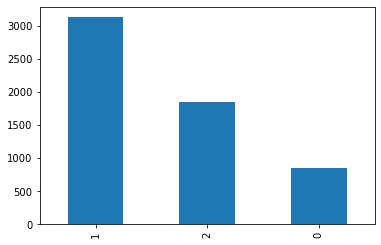

In [10]:
df['Sentiment'].value_counts().plot.bar()

In [11]:
df.head()

,Sentence,Sentiment,transformed_text
0,The GeoSolutions technology will leverage Bene...,2,geosolut technolog leverag benefon gp solut pr...
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",0,esi low bk real possibl
2,"For the last quarter of 2010 , Componenta 's n...",2,last quarter 2010 componenta net sale doubl eu...
3,According to the Finnish-Russian Chamber of Co...,1,accord chamber commerc major construct compani...
4,The Swedish buyout firm has sold its remaining...,1,swedish buyout firm sold remain percent stake ...


A word cloud is a visual representation of text data where the size of each word indicates its frequency or importance in the given text. It helps to visually highlight the most common or significant words in a text document.

In [12]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

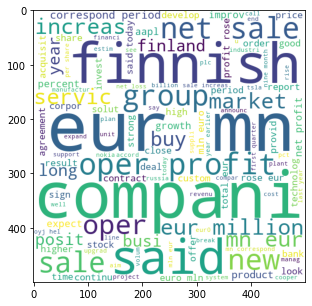

In [13]:
positive_wc = wc.generate(df[df['Sentiment'] == 2]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(positive_wc)
plt.show()

In [14]:
df.dtypes

Sentence            object
Sentiment            int64
transformed_text    object
dtype: object

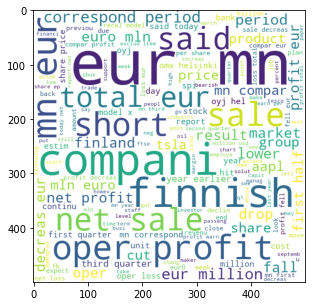

In [16]:
negative_wc = wc.generate(df[df['Sentiment'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(negative_wc)
plt.show()

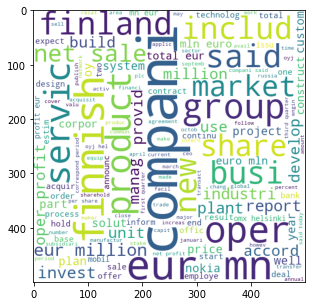

In [17]:
neutral_wc = wc.generate(df[df['Sentiment'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(10,5))
plt.imshow(neutral_wc)
plt.show()

In [18]:
pos_frequncy = []  
for msg in df[df['Sentiment'] == 2]['transformed_text'].to_list():
    # Split the message into individual words
    for word in msg.split():
        # Append each word to the pos_frequncy list
        pos_frequncy.append(word)

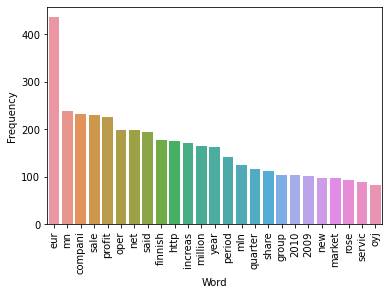

In [20]:
from collections import Counter
# Count the frequency of each word in the pos_frequncy list
word_frequency = Counter(pos_frequncy)

# Retrieve the 25 most common words along with their frequencies
most_common_words = word_frequency.most_common(25)

# Create a dataframe from the most_common_words list
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the bar plot
sns.barplot(data=df_most_common, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

In [23]:
neg_frequncy = []  
for msg in df[df['Sentiment'] == 0]['transformed_text'].to_list():
    # Split the message into individual words
    for word in msg.split():
        # Append each word to the neg_frequncy list
        neg_frequncy.append(word)

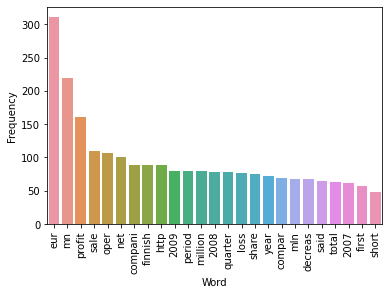

In [24]:
# Count the frequency of each word in the pos_frequncy list
word_frequency = Counter(neg_frequncy)

# Retrieve the 25 most common words along with their frequencies
most_common_words = word_frequency.most_common(25)

# Create a dataframe from the most_common_words list
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the bar plot
sns.barplot(data=df_most_common, x='Word', y='Frequency')
plt.xticks(rotation='vertical')
plt.show()

# Model Building

In NLP, the ultimate goal is to enable computers to understand and work with human language. However, computers primarily operate on numerical data. So, to bridge the gap between human language and computational algorithms, we need to convert text into a numerical format that machines can process effectively. This is where vectorization comes into play.

By converting text into numerical vectors, we can apply machine learning algorithms, perform mathematical operations, extract meaningful features, and process large amounts of text data effectively. It helps machines "translate" human language into a format they can comprehend and work with, enabling a wide range of applications, from language translation and sentiment analysis to chatbots and text summarization.

In [25]:
cv = CountVectorizer() #implementing BOW vectorization on our text

In [26]:
# Transform the text data into a numerical representation using CountVectorizer 
#and convert it into a 2D array 
X = cv.fit_transform(df['transformed_text']).toarray()

Need of .toarray()

When we use the fit_transform() method of the CountVectorizer, it transforms the text data into a numerical representation known as a sparse matrix. A sparse matrix only stores the non-zero elements, which is an efficient way to represent text data since most text samples will only contain a small subset of all possible words.

However, in some cases, we might need to work with the transformed data in a different format. By using the .toarray() method, we convert the sparse matrix into a 2D array (an array of arrays). Each row in the array corresponds to a text sample, and each column represents a specific word or term from the vocabulary of the text data. The values in the array indicate the frequency or presence of each word or term in the respective text sample.

Converting the sparse matrix to a 2D array makes it easier to perform certain operations or calculations on the data. It allows us to access individual elements directly and perform various computations. Therefore, using .toarray() provides a more accessible and intuitive representation of the transformed text data, especially for tasks that require array-based operations.

In summary, the .toarray() method is used to convert the transformed text data from a sparse matrix representation to a 2D array, making it easier to work with and manipulate the data in various ways.

In [27]:
X.shape

(5842, 7960)

In [28]:
y = df['Sentiment'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [30]:
mnb = MultinomialNB()

In [34]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)

In [35]:
print(metrics.accuracy_score(y_test,y_pred1))
print(metrics.confusion_matrix(y_test,y_pred1))

0.6800684345594525
[[ 81  71  38]
 [ 75 465  63]
 [ 27 100 249]]


# TF IDF Vectorization

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [37]:
# Perform TF-IDF vectorization on the 'transformed_text' column of the dataframe
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['Sentiment'].values

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [39]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)

In [40]:
print(metrics.accuracy_score(y_test,y_pred1))
print(metrics.confusion_matrix(y_test,y_pred1))

0.6715141146278871
[[ 20 123  47]
 [  8 564  31]
 [  4 171 201]]
